
# Project: Investigate a Dataset - [TMDb movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Dataset Description 

 
> This is a data analysis project using TMDb movies dataset . 

> data set contaian information about the names and all the details about movies like [duration,director,cast,description..etc] ,It consist of 21 columns such as imdb_id, revenue, budget, vote_count


### **Questions for Analysis**
> 1. popular director?
> 2. popular Movies runtime?
> 3. what is the movie has the most rate?
> 4. what is the average investment in film industry?
> 5. What is the most money lost movie?
> 6. what is the most productive year ? 
> 7. How the vote average affected on revenue? 
> 8. what is the top 20 geners of movies ? 
> 9. What kinds of properties are associated with movies that have high revenues? 
> 10. who is the most famous actors?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
# Data Wrangling

> After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable.

>


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data

#loading the csv file and storing it in the variable "Movies"

movies=pd.read_csv("tmdb-movies.csv")

#print the 5 rows in the dataframe to learning the data
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **check the information of the data**

In [4]:
# types and look for instances of missing or possibly errant data.

#used this function to check the info of data like missing data ,nan values etc..

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


## **Cleaning for Analysis**

> 1. Remove useless columns
> 2. Remove NULL values
> 3. Remove duplicate values
> 4. correct the data type for some columnsn release_year 
 


>### Edit or delete NAN Values

In [5]:
#creating a list of columb to be deleted
del_col=['imdb_id','id','budget_adj','revenue_adj','homepage','tagline','overview','keywords'] 
#deleting the columns
movies.drop(labels=del_col,axis=1,inplace=True)

#previewing the new dataset
movies.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [5]:
# using dropna to remove all rows that contain a NAN value 
movies.dropna(subset=['imdb_id', 'cast','genres'],inplace=True)
movies.shape


(10760, 21)


>### Drop duplicate rows

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#we use drop duplicate to remove all duplicate columns 
movies.drop_duplicates(inplace=True)
movies.shape

(10759, 21)


>### replace some columns with the right datatype

In [7]:
#using to_datetime() function to turn data type to date data type 

movies['release_date']=pd.to_datetime(movies['release_date'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10759 entries, 0 to 10865
Data columns (total 21 columns):
id                      10759 non-null int64
imdb_id                 10759 non-null object
popularity              10759 non-null float64
budget                  10759 non-null int64
revenue                 10759 non-null int64
original_title          10759 non-null object
cast                    10759 non-null object
homepage                2901 non-null object
director                10726 non-null object
tagline                 8007 non-null object
keywords                9318 non-null object
overview                10757 non-null object
runtime                 10759 non-null int64
genres                  10759 non-null object
production_companies    9787 non-null object
release_date            10759 non-null datetime64[ns]
vote_count              10759 non-null int64
vote_average            10759 non-null float64
release_year            10759 non-null int64
budget_adj       

# Exploratory Data Analysis


>### popular director ? 
>Using Function to avoid repetitive code.

In [8]:
# defining a function to find max of the counts 
def most_pop(col):
    x=movies[col].value_counts().idxmax()
    return x 


In [9]:
#calling the function
most_pop('director')

'Woody Allen'

>### popular Movie runtime ? 

In [10]:
#replacing 0 with NaN of runtime column in the dataset
movies['runtime'] =movies['runtime'].replace(0, np.NAN)

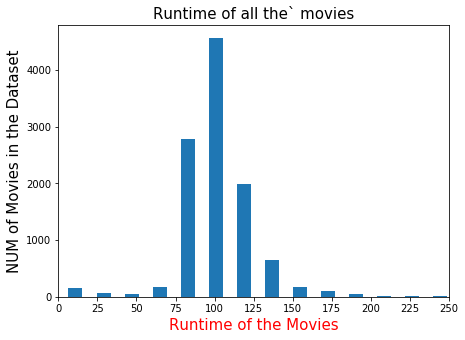

In [11]:
movies['runtime'].plot(kind ="hist" , rwidth = 0.5, bins =50,figsize=(7,5))
#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15 ,color='r')
#On y-axis 
plt.ylabel('NUM of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the` movies', fontsize=15)
#important
plt.xlim(0, 250)
#important step25
plt.xticks(np.arange(0, 251, step=25))
plt.show()

### reasoning section

In [12]:
#call the function 
most_pop('runtime')

90.0

>### what is the movie has the most rate? 


In [34]:
#select the max vote then return the name of the movie

movies[movies['vote_average']==movies['vote_average'].max()]["original_title"].tolist()
#popular_movie.head()


['The Story of Film: An Odyssey']

>### what is the average investment in film industry ? 

In [35]:
#using the mean() to return ave of budget and to nearest used int()
int(movies['budget'].mean())


14625701

>### What is the most money lost movie?

In [48]:
#subtraction budget from revenue, and get the min result to detect the film name
'''def profit(fun):
    
    movies['profit']=movies['revenue']-movies['budget']
    #print(movies['bad_movie'].min())
    movies[movies['profit']==movies['profit'].fun()]["original_title"].tolist()'''

#print("the genere of the movie that get the most revenue : ",var)

movies['profit']=movies['revenue']-movies['budget']
#print(movies['bad_movie'].min())
movies[movies['profit']==movies['profit'].min()]["original_title"].tolist()



["The Warrior's Way"]

>### What is the most profit ?

In [47]:
#profit(pd.Series.max)

In [49]:
#subtraction budget from revenue, and get the min result to detect the film name

#movies['bad_movie']=movies['revenue']-movies['budget']
#print(movies['bad_movie'].min())
movies[movies['profit']==movies['profit'].max()]["original_title"].tolist()


#print("the genere of the movie that get the most revenue : ",var)

['Avatar']

>### who is the most famous actors?

In [62]:
#function which will take any column as argument from and keep its track 

def split_data(column):
    #will take a column, and separate the string by '|'
    data = movies[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count


(40, 80)

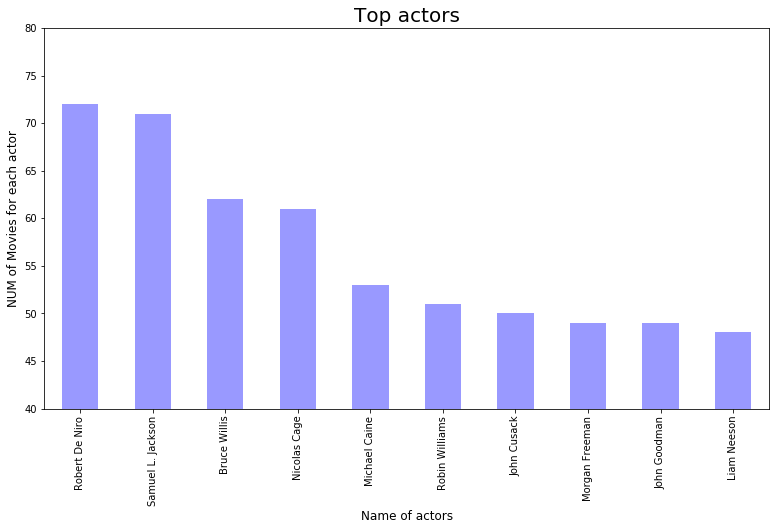

In [66]:
x=split_data("cast")
x.head(10).plot(kind="bar" ,figsize=(13,7),color='b',alpha=0.4)
#On x-axis 
plt.xlabel('Name of actors', fontsize = 12)
#On y-axis 
plt.ylabel('NUM of Movies for each actor', fontsize=12)
#Name of the graph
plt.title('Top actors', fontsize=20)
plt.ylim(40,80)

### reasoning section

In [67]:
split_data("cast").head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
Morgan Freeman       49
John Goodman         49
Liam Neeson          48
dtype: int64

>### what is the most productive year ? 

Text(0.5,1,'Year')

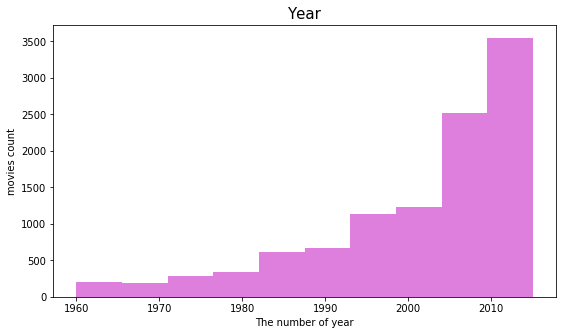

In [19]:
#using matpltlib to show values

movies['release_year'].plot(kind='hist',color='m',alpha=0.5,figsize=(9,5))
plt.xlabel("The number of year",fontsize=10)
plt.ylabel("movies count",fontsize=10)
plt.title('Year', fontsize=15)

### reasoning section

In [20]:
print(movies['release_year'].value_counts())

2014    687
2013    652
2015    619
2012    575
2011    532
2009    526
2008    492
2010    481
2007    433
2006    404
2005    361
2004    307
2003    281
2002    264
2001    241
2000    224
1999    224
1998    210
1996    203
1997    191
1994    184
1993    178
1995    174
1988    142
1989    135
1991    133
1992    132
1990    132
1987    124
1986    120
1985    109
1984    104
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     56
1971     55
1973     55
1976     47
1974     46
1966     46
1975     44
1964     42
1970     40
1972     40
1967     39
1968     38
1965     35
1963     34
1962     32
1960     32
1961     31
1969     30
Name: release_year, dtype: int64



### How the vote average affected on revenue?

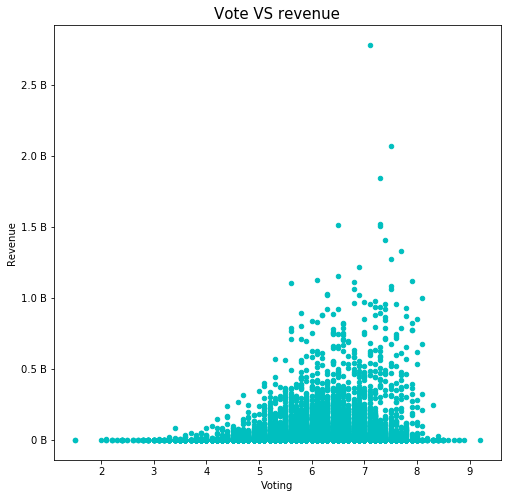

In [91]:
#using matpltlib to show values
#print(movies["revenue"].head())
movies.plot(x="vote_average",y="revenue", kind = 'scatter',figsize = (8,8),color='c' );
plt.xlabel("Voting")
plt.ylabel("Revenue")
plt.title('Vote VS revenue', fontsize=15)

#before=[0.0,0.5,1.0]
plt.yticks(np.arange(0*1e9,3*1e9,0.5*1e9),["0 B","0.5 B","1.0 B","1.5 B","2.0 B","2.5 B"])
plt.show()

### reasoning section


In [22]:
print("ave of revenue",movies["revenue"].mean())
print("ave of rating",movies["vote_average"].mean())

ave of revenue 40215978.59531555
ave of rating 5.966632586671624


### what is the top 20 geners of movies ? 

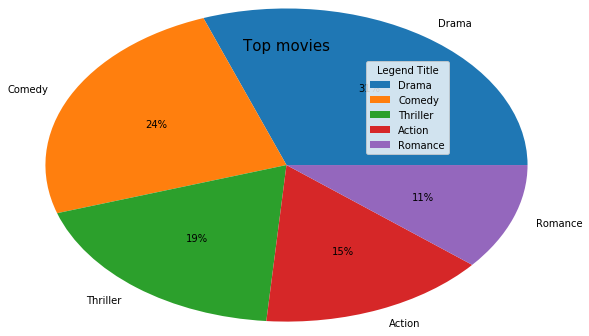

In [141]:
##using matpltlib to show values
#select the first 30 row to compare the most genres
x=split_data('genres')
#print(x.head(10))
#print()
#x.head(10).plot(kind = 'pie',figsize = (8,8))
plt.pie(x.head(5),labels=x.head(5).index.tolist(),autopct='%.0f%%',radius = 1.8)
#movies['genres'].value_counts()[:20].plot( kind = 'pie',figsize = (10,10));
plt.xlabel(" ")
plt.ylabel(" ")
plt.legend(loc='best', title='Legend Title',prop={'size': 10})
#plt.figsize = (50,50)
plt.title('Top movies', fontsize=15)
plt.show()

### reasoning section

In [105]:
print(movies['genres'].value_counts(normalize=True)[:10])

Drama                   0.065664
Comedy                  0.065664
Documentary             0.028774
Drama|Romance           0.026653
Comedy|Drama            0.025823
Comedy|Romance          0.024716
Horror|Thriller         0.023886
Horror                  0.023333
Comedy|Drama|Romance    0.020474
Drama|Thriller          0.012727
Name: genres, dtype: float64


###  What kinds of properties are associated with movies that have high revenues?

In [25]:
#retuen the max revenue and put it in new dataframe ,then detect the populat generes
geners=movies[movies['revenue']==movies['revenue'].max()]
var=geners["genres"]
print("the genere of the movie that get the most revenue : ",var)


the genere of the movie that get the most revenue :  1386    Action|Adventure|Fantasy|Science Fiction
Name: genres, dtype: object


<a id='conclusions'></a>
# Conclusions


### using analysis tools is amazing to explore the data and reach to very important information that help the dataset owner to make decision ,let me show you some of this information :

> After cleaning the data and know the new version of the data very good we search about some answer to our quastions like who is the popular film and the most famous director in this field and we find that Woody Allen is the best director and The Story of Film: An Odyssey has the best rate  

> the most types in the cinema that the people prefer is comedian then drama , drama romance etc..

> the genere of the movie effected on revenue and we noticed that Action|Adventure|Fantasy|Science Fiction this type reached to the highest revenue

> We noticed a huge difference in the increase in film production over the years, and the most profitable year was 2010

# Limitations:

**This analysis was done considering the movies which had a significant amount of profit of  432683713707  dollar. 
This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completel corect and up-to-date.
As mentioned before the budget and revenue column do not have currency unit,
it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong.
Dropping the rows with missing values also affected the overall analysis.**

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0